In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import time
import seaborn as sns

In [86]:
X_train = pd.read_csv('../2_INPUT_DATA/3_SPLIT/X_train.csv')
Y_train = pd.read_csv('../2_INPUT_DATA/3_SPLIT/Y_train.csv')
X_test = pd.read_csv('../2_INPUT_DATA/3_SPLIT/X_test.csv')
Y_test = pd.read_csv('../2_INPUT_DATA/3_SPLIT/Y_test.csv')
ids_test = pd.read_csv('../2_INPUT_DATA/3_SPLIT/ids_test.csv')
feature_names = pd.read_csv('../2_INPUT_DATA/2_FEATURE_PROCESSED/feature_names.csv')

X_train_slice = pd.read_csv('./data/X_train_slice.csv')

In [80]:
X_train.columns = feature_names['0'].tolist()

In [81]:
def plot_histogram(data, category, bin_size):
    
    print(data)
    # Highlighted data point
    #highlighted_index = 0  # Index of the data point to highlight
    #highlighted_value = data.loc[highlighted_index, category]

    # Plotting
    fig, ax = plt.subplots()
    hist = sns.histplot(data=data, x=category, hue='TARGET', kde=True, bins=bin_size, multiple='stack', ax=ax) #stat='density',
    # Get the counts for each bin
    #hight_P = hight_of_selected_point(hist, data, highlighted_index)

    # Highlight one specific data point
    #if Y_train.loc[highlighted_index, 'TARGET'] == 1:
    #    ax.scatter(highlighted_value, hight_P, color='red', label='Highlighted Point', zorder=5)
    #elif Y_train.loc[highlighted_index, 'TARGET'] == 0:
    #    ax.scatter(highlighted_value, hight_P, color='blue', label='Highlighted Point', zorder=5)

    # Customize plot
    ax.set_xlabel(category)
    ax.set_ylabel('Number of Customers')
    ax.set_title('Stacked Distribution of Customer Age with Highlighted Point')
    legend = ax.get_legend()
    handles = legend.legend_handles
    legend.remove()
    ax.legend(handles, ['0 pays', '1 will have difficulty'], title='Client group')

    plt.show(fig)

In [82]:
def hight_of_selected_point(hist, data, highlighted_index):
    bin_counts = [rect.get_height() for rect in hist.patches]
    print(len(bin_counts))
    print(len(bin_counts)/2)
    print(min(data['DAYS_BIRTH']), " ", max(data['DAYS_BIRTH']))
    print("selected point: ", data.loc[highlighted_index, 'DAYS_BIRTH'])
    scaled_point = int(round(data.loc[highlighted_index, 'DAYS_BIRTH']-min(data['DAYS_BIRTH'])))
    print("scaled point: ", scaled_point)

    steps = (max(data['DAYS_BIRTH'])-min(data['DAYS_BIRTH']))/(len(bin_counts)/2)
    print("steps :", steps )
    
    if data.loc[highlighted_index, 'TARGET'] == 0:
        bucket = int(round(scaled_point / steps,0))
 
    elif data.loc[highlighted_index, 'TARGET'] == 1:
        bucket = int(round(scaled_point / steps,0)+(len(bin_counts)/2))
        
    print("bucket :", bucket)
    hight = bin_counts[bucket]/2
    print("hight :", hight)
    
    return hight

In [84]:
selection = ['SK_ID_CURR','TARGET','DAYS_BIRTH','DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 
             'OWN_CAR_AGE', 'AMT_CREDIT','CODE_GENDER','CNT_CHILDREN'
            ]

In [143]:
 X_train_slice

SK_ID_CURR  TARGET  DAYS_BIRTH  DAYS_EMPLOYED  AMT_INCOME_TOTAL  \
0           100002       1       -9461           -637          202500.0   
1           100003       0      -16765          -1188          270000.0   
2           100004       0      -19046           -225           67500.0   
3           100006       0      -19005          -3039          135000.0   
4           100007       0      -19932          -3038          121500.0   
...            ...     ...         ...            ...               ...   
307506      456251       0       -9327           -236          157500.0   
307507      456252       0      -20775         365243           72000.0   
307508      456253       0      -14966          -7921          153000.0   
307509      456254       1      -11961          -4786          171000.0   
307510      456255       0      -16856          -1262          157500.0   

        OWN_CAR_AGE  AMT_CREDIT CODE_GENDER  CNT_CHILDREN        age  \
0               NaN    406597.5           M             0  25.920548   
1               NaN   1293502.5           F             0  45.931507   
2              26.0    135000.0           M             0  52.180822   
3               NaN    312682.5           F             0  52.068493   
4               NaN    513000.0           M             0  54.608219   
...             ...         ...         ...           ...        ...   
307506          NaN    254700.0           M             0  25.553425   
307507          NaN    269550.0           F             0  56.917808   
307508          NaN    677664.0           F             0  41.002740   
307509          NaN    370107.0           F             0  32.769863   
307510          NaN    675000.0           F             0  46.180822   

        Work_in_years  
0            1.745205  
1            3.254795  
2            0.616438  
3            8.326027  
4            8.323288  
...               ...  
307506       0.646575  
307507    1000.665753  
307508      21.701370  
307509      13.112329  
307510       3.457534  

[307511 rows x 11 columns]

In [88]:
X_train_select = X_train_slice
X_train_select['age'] = abs(X_train_select['DAYS_BIRTH'])/365
X_train_select['Work_in_years'] = abs(X_train_select['DAYS_EMPLOYED'])/365
X_train_select.describe()

SK_ID_CURR         TARGET     DAYS_BIRTH  DAYS_EMPLOYED  \
count  307511.000000  307511.000000  307511.000000  307511.000000   
mean   278180.518577       0.080729  -16036.995067   63815.045904   
std    102790.175348       0.272419    4363.988632  141275.766519   
min    100002.000000       0.000000  -25229.000000  -17912.000000   
25%    189145.500000       0.000000  -19682.000000   -2760.000000   
50%    278202.000000       0.000000  -15750.000000   -1213.000000   
75%    367142.500000       0.000000  -12413.000000    -289.000000   
max    456255.000000       1.000000   -7489.000000  365243.000000   

       AMT_INCOME_TOTAL    OWN_CAR_AGE    AMT_CREDIT   CNT_CHILDREN  \
count      3.075110e+05  104582.000000  3.075110e+05  307511.000000   
mean       1.687979e+05      12.061091  5.990260e+05       0.417052   
std        2.371231e+05      11.944812  4.024908e+05       0.722121   
min        2.565000e+04       0.000000  4.500000e+04       0.000000   
25%        1.125000e+05       5.000000  2.700000e+05       0.000000   
50%        1.471500e+05       9.000000  5.135310e+05       0.000000   
75%        2.025000e+05      15.000000  8.086500e+05       1.000000   
max        1.170000e+08      91.000000  4.050000e+06      19.000000   

                 age  Work_in_years  
count  307511.000000  307511.000000  
mean       43.936973     185.547239  
std        11.956133     382.037676  
min        20.517808       0.000000  
25%        34.008219       2.556164  
50%        43.150685       6.079452  
75%        53.923288      15.635616  
max        69.120548    1000.665753

Preparation of 0 and 1 stats for AMT_INCOME_TOTAL

In [127]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Set3
#from bokeh.palettes import Category10_2
output_notebook()
#def bokeh_scatter(x,y,hue):
    
x= X_train_slice['DAYS_BIRTH']
y= X_train_slice['AMT_INCOME_TOTAL']
hue=X_train_slice['TARGET']

# Create a ColumnDataSource
source = ColumnDataSource(data=dict(x=x, y=y, hue=hue))

# Define color mapping
color = Set3[3][0:2]
colors = factor_cmap('hue', palette=color , factors=['0', '1'])

# Create a scatter plot
p = figure(plot_width=600, plot_height=400, title="Scatter Plot with Hue 0 or 1")
p.scatter(x='x', y='y', source=source, size=10, color=colors, legend_field='hue')

# Show the plot
show(p)



#bokeh_scatter(X_train_slice['AMT_INCOME_TOTAL'], X_train_slice['DAYS_BIRTH'],  X_train_slice['TARGET'])


Loading BokehJS ...

In [145]:
Set3[4]

('#8dd3c7', '#ffffb3', '#bebada', '#fb8072')

In [146]:
import bokeh.plotting as bpl
import bokeh.models as bmo
bpl.output_notebook()


df = pd.DataFrame(
    {
        "journey": ['ch1', 'ch2', 'ch2', 'ch1'],
        "cat": ['a', 'b', 'a', 'c'],
        "kpi1": [1,2,3,4],
        "kpi2": [4,3,2,1],
        "color": ['#8dd3c7', '#fb8072', '#8dd3c7', 'green']
    }
)
df

source = bpl.ColumnDataSource.from_df(df)
hover = bmo.HoverTool(
    tooltips=[
        ('journey', '@journey'),
        ("Cat", '@cat')
    ]
)
p = bpl.figure(tools=[hover])

p.scatter(
    'kpi1', 
    'kpi2', source=source, color='color')

bpl.show(p)

Loading BokehJS ...

In [147]:
X_train_slice['color'] = '#8dd3c7'

# Define your condition
condition = X_train_slice['TARGET'] == 1

# Use boolean indexing to set the color value for rows that meet the condition
X_train_slice.loc[condition, 'color'] = '#fb8072'

In [152]:
X_train_slice_test = X_train_slice[:100]
X_train_slice_test

SK_ID_CURR  TARGET  DAYS_BIRTH  DAYS_EMPLOYED  AMT_INCOME_TOTAL  \
0       100002       1       -9461           -637          202500.0   
1       100003       0      -16765          -1188          270000.0   
2       100004       0      -19046           -225           67500.0   
3       100006       0      -19005          -3039          135000.0   
4       100007       0      -19932          -3038          121500.0   
..         ...     ...         ...            ...               ...   
95      100113       0      -15137          -7980           76500.0   
96      100114       0      -10734           -693          135000.0   
97      100115       0      -15371           -367           90000.0   
98      100116       0      -14751          -6737          243000.0   
99      100118       0      -22471         365243           90000.0   

    OWN_CAR_AGE  AMT_CREDIT CODE_GENDER  CNT_CHILDREN        age  \
0           NaN    406597.5           M             0  25.920548   
1           NaN   1293502.5           F             0  45.931507   
2          26.0    135000.0           M             0  52.180822   
3           NaN    312682.5           F             0  52.068493   
4           NaN    513000.0           M             0  54.608219   
..          ...         ...         ...           ...        ...   
95         11.0    135000.0           M             0  41.471233   
96          NaN    284400.0           F             0  29.408219   
97          NaN    315000.0           F             0  42.112329   
98          NaN    900000.0           F             0  40.413699   
99          NaN    675000.0           F             0  61.564384   

    Work_in_years    color  
0        1.745205  #fb8072  
1        3.254795  #8dd3c7  
2        0.616438  #8dd3c7  
3        8.326027  #8dd3c7  
4        8.323288  #8dd3c7  
..            ...      ...  
95      21.863014  #8dd3c7  
96       1.898630  #8dd3c7  
97       1.005479  #8dd3c7  
98      18.457534  #8dd3c7  
99    1000.665753  #8dd3c7  

[100 rows x 12 columns]

In [153]:
df = pd.DataFrame(
    {
        "gender": X_train_slice_test['CODE_GENDER'],
        "risk":  X_train_slice_test['TARGET'],
        "kpi1": X_train_slice_test['age'],
        "kpi2": X_train_slice_test['AMT_INCOME_TOTAL'],
        "color": X_train_slice_test['color']
    }
)
df

source = bpl.ColumnDataSource.from_df(df)
hover = bmo.HoverTool(
    tooltips=[
        ('gender', '@gender'),
        ("RISK", '@risk')
    ]
)
p = bpl.figure(tools=[hover],)

p.scatter(
    'kpi1', 
    'kpi2', source=source, color='color')

bpl.show(p)

In [141]:
colors# Accessing key-value pairs
items = colors['transform']
print("Key-Value Pairs:", items)

Key-Value Pairs: CategoricalColorMapper(id='1845', ...)


In [140]:
# Iterate over the list and extract the id attribute from each CategoricalColorMapper object
mapper_ids = [variable['transform'].id for variable in colors]

# Now you have a list of ids
print(mapper_ids)

TypeError: string indices must be integers

In [91]:
#Merge X_train and Y_train into a single DataFrame
#data = pd.concat([X_train['DAYS_BIRTH']/365, Y_train], axis=1)
data_full = pd.concat([X_train_select, Y_train], axis=1)
data_full = X_train_select.copy()
category = 'DAYS_BIRTH'
category = 'AMT_INCOME_TOTAL'
data_0 = data[data['TARGET']==0]
data_1 = data[data['TARGET']==1]
data_full_0 = data_full[data_full['TARGET']==0]
data_full_1 = data_full[data_full['TARGET']==1]

In [96]:
print(data_full_0['AMT_INCOME_TOTAL'].describe())
print(data_full_1['AMT_INCOME_TOTAL'].describe())
too_big = data_full[data_full['AMT_INCOME_TOTAL']>1000000]
too_big.shape

count    2.826860e+05
mean     1.690777e+05
std      1.104763e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64
count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


(250, 11)

In [97]:
data_full_0.describe()

SK_ID_CURR    TARGET     DAYS_BIRTH  DAYS_EMPLOYED  \
count  282686.000000  282686.0  282686.000000  282686.000000   
mean   278244.744536       0.0  -16138.176397   65696.146123   
std    102825.776954       0.0    4364.200856  142877.810161   
min    100003.000000       0.0  -25229.000000  -17912.000000   
25%    189103.250000       0.0  -19793.750000   -2813.000000   
50%    278362.500000       0.0  -15877.000000   -1235.000000   
75%    367241.500000       0.0  -12536.000000    -278.000000   
max    456255.000000       0.0   -7489.000000  365243.000000   

       AMT_INCOME_TOTAL   OWN_CAR_AGE    AMT_CREDIT   CNT_CHILDREN  \
count      2.826860e+05  97006.000000  2.826860e+05  282686.000000   
mean       1.690777e+05     11.935540  6.026483e+05       0.412946   
std        1.104763e+05     11.891359  4.068459e+05       0.718843   
min        2.565000e+04      0.000000  4.500000e+04       0.000000   
25%        1.125000e+05      5.000000  2.700000e+05       0.000000   
50%        1.485000e+05      9.000000  5.177880e+05       0.000000   
75%        2.025000e+05     15.000000  8.100000e+05       1.000000   
max        1.800009e+07     91.000000  4.050000e+06      19.000000   

                 age  Work_in_years  
count  282686.000000  282686.000000  
mean       44.214182     190.873458  
std        11.956715     386.255773  
min        20.517808       0.000000  
25%        34.345205       2.649315  
50%        43.498630       6.312329  
75%        54.229452      16.641096  
max        69.120548    1000.665753

In [77]:
data_full_1.describe()

DAYS_BIRTH  DAYS_EMPLOYED  AMT_INCOME_TOTAL   OWN_CAR_AGE  \
count  19941.000000   19941.000000      1.994100e+04  19941.000000   
mean   14888.228624   -1595.467930      1.670948e+05      4.188907   
std     4205.554566    1838.622315      8.318292e+05      9.435478   
min     7678.000000  -14540.000000      2.565000e+04      0.000000   
25%    11386.000000   -2150.000000      1.125000e+05      0.000000   
50%    14288.000000   -1031.000000      1.350000e+05      0.000000   
75%    18059.000000    -375.000000      2.025000e+05      4.000000   
max    25168.000000       0.000000      1.170000e+08     65.000000   

         AMT_CREDIT           age  Work_in_years   TARGET  
count  1.994100e+04  19941.000000   19941.000000  19941.0  
mean   5.579012e+05     40.789667       4.371145      1.0  
std    3.448830e+05     11.522067       5.037321      0.0  
min    4.500000e+04     21.035616       0.000000      1.0  
25%    2.844000e+05     31.194521       1.027397      1.0  
50%    4.975200e+05     39.145205       2.824658      1.0  
75%    7.380000e+05     49.476712       5.890411      1.0  
max    4.027680e+06     68.953425      39.835616      1.0

In [78]:
data_INCOME = data_full[data_full['AMT_INCOME_TOTAL']<500]
2.025000e+05
2.565000e+04
1.688333e+05
8.318292e+05

831829.2

        NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0                    0.000         0.000            0.001         0.000   
1                    0.000         0.000            0.000         0.000   
2                    0.001         0.001            0.001         0.000   
3                    0.000         0.000            0.001         0.000   
4                    0.000         0.000            0.001         0.000   
...                    ...           ...              ...           ...   
246003               0.001         0.001            0.001         0.000   
246004               0.000         0.000            0.001         0.000   
246005               0.000         0.001            0.001         0.002   
246006               0.000         0.001            0.000         0.002   
246007               0.000         0.001            0.001         0.001   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0                  202.5    4

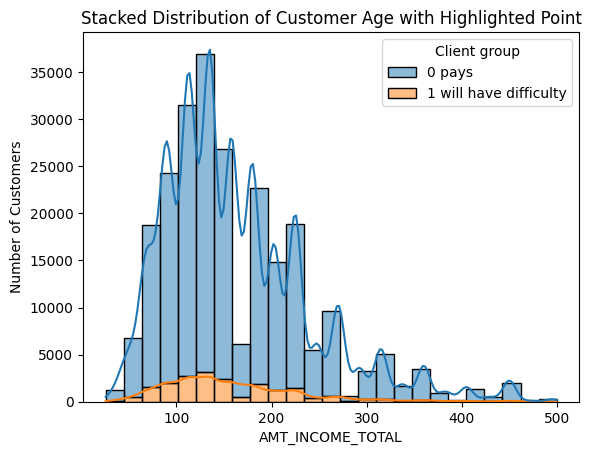

In [62]:
plot_histogram(data_INCOME, category,25)

## Preparing DAYS_BIRTH

In [120]:

print(min(data['DAYS_BIRTH']), " ", max(data['DAYS_BIRTH']))
min_age = int(round(min(data['DAYS_BIRTH']),0))
max_age = int(round(max(data['DAYS_BIRTH']),0))
print(min_age, " ", max_age)
num_bin = max_age - min_age
print(num_bin)
range_age = range(min_age, max_age, 1)
len(range_age)

20.517808219178082   69.04383561643836
21   69
48


48

In [123]:
#plot_histogram(data, category)

48


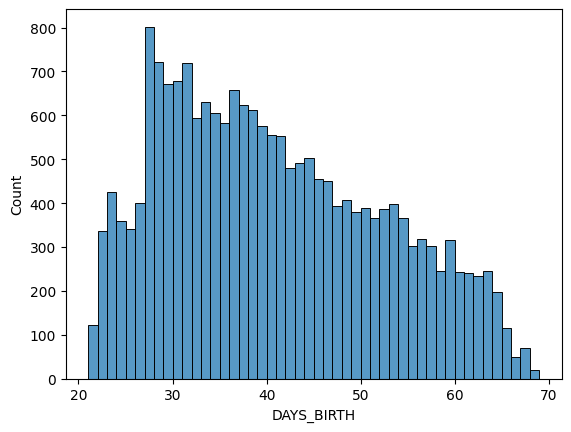

In [122]:
fig, ax = plt.subplots()
hist = sns.histplot(data=data_1['DAYS_BIRTH'],  bins=48,  ax=ax)
bar_height_1 = [h.get_height() for h in hist.patches]
print(len(bar_height_1))
#plt.show(fig)
#pyplot.bar(range_age, bar_height_1)

48


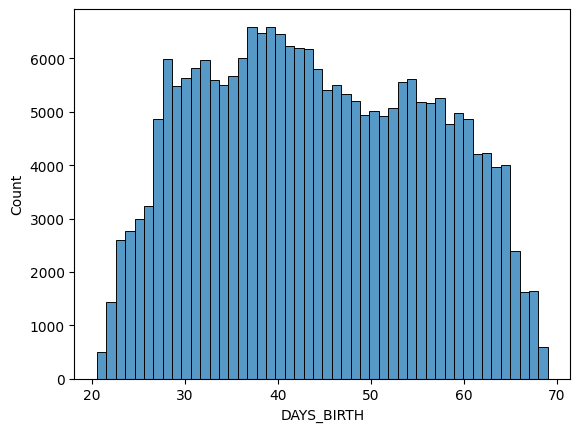

In [115]:
fig, ax = plt.subplots()
hist = sns.histplot(data=data_0['DAYS_BIRTH'],  bins=48,  ax=ax)
bar_height_0 = [h.get_height() for h in hist.patches]
print(len(bar_height_0))
#plt.show(fig)
#pyplot.bar(range_age, bar_height_0)
#pyplot.bar(range_age, bar_height_1, color='b')

In [130]:
age_ratio =  [x/(x + y) for x, y in zip(bar_height_1, bar_height_0)]
# Create a dictionary with column names as keys and lists as values
data = {
    'Age': range_age, 
    'TARGET0': bar_height_0,
    'TARGET1': bar_height_1,
    'AGE1ratio': age_ratio
}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)
df.to_csv('data/1_age.csv', index = False)
# Display the DataFrame
print(df)

    Age  TARGET0  TARGET1  AGE1ratio
0    21      497      122   0.197092
1    22     1444      336   0.188764
2    23     2597      426   0.140920
3    24     2770      359   0.114733
4    25     2995      341   0.102218
5    26     3233      401   0.110347
6    27     4870      802   0.141396
7    28     5983      722   0.107681
8    29     5490      672   0.109056
9    30     5627      679   0.107675
10   31     5818      719   0.109989
11   32     5975      595   0.090563
12   33     5595      631   0.101349
13   34     5499      606   0.099263
14   35     5677      582   0.092986
15   36     5998      658   0.098858
16   37     6593      624   0.086463
17   38     6479      612   0.086307
18   39     6586      576   0.080424
19   40     6463      555   0.079082
20   41     6229      552   0.081404
21   42     6203      481   0.071963
22   43     6182      491   0.073580
23   44     5794      504   0.080025
24   45     5413      454   0.077382
25   46     5497      451   0.075824
2

In [109]:
data_daysemployed = round(abs(X_train['DAYS_EMPLOYED']),0)
print(data_daysemployed.describe())
ser_int = pd.Series([int(x) for x in data_daysemployed])
data_daysemployed
from collections import Counter
Counter(data_daysemployed)

count    246008.000000
mean       1955.357025
std        2307.808522
min           0.000000
25%         288.000000
50%        1214.000000
75%        2764.000000
max       17546.000000
Name: DAYS_EMPLOYED, dtype: float64


Counter({637.0: 52,
         1188.0: 62,
         225.0: 99,
         3039.0: 36,
         3038.0: 27,
         1588.0: 52,
         3130.0: 22,
         449.0: 75,
         0.0: 44321,
         2019.0: 53,
         679.0: 77,
         2717.0: 37,
         3028.0: 36,
         203.0: 84,
         1157.0: 68,
         1317.0: 49,
         191.0: 97,
         7804.0: 7,
         2038.0: 43,
         4286.0: 12,
         1652.0: 50,
         4306.0: 10,
         746.0: 80,
         3494.0: 24,
         2628.0: 30,
         1234.0: 50,
         1796.0: 43,
         1010.0: 74,
         2668.0: 30,
         1104.0: 56,
         4404.0: 12,
         2060.0: 39,
         4585.0: 11,
         1275.0: 59,
         768.0: 63,
         1288.0: 62,
         1761.0: 46,
         1262.0: 51,
         475.0: 76,
         3597.0: 18,
         758.0: 71,
         895.0: 71,
         5332.0: 13,
         4411.0: 14,
         9523.0: 4,
         1176.0: 68,
         6977.0: 5,
         778.0: 70,
       

In [26]:
xdays_unemployed = abs(X_train[X_train['DAYS_EMPLOYED']<0]['DAYS_EMPLOYED'])
ydays_unemployed = Y_train[X_train['DAYS_EMPLOYED']<0]
xdays_unemployed

0          637.0
1         1188.0
2          225.0
3         3039.0
4         3038.0
           ...  
246000    4893.0
246003     486.0
246005      85.0
246006     597.0
246007     119.0
Name: DAYS_EMPLOYED, Length: 201687, dtype: float64

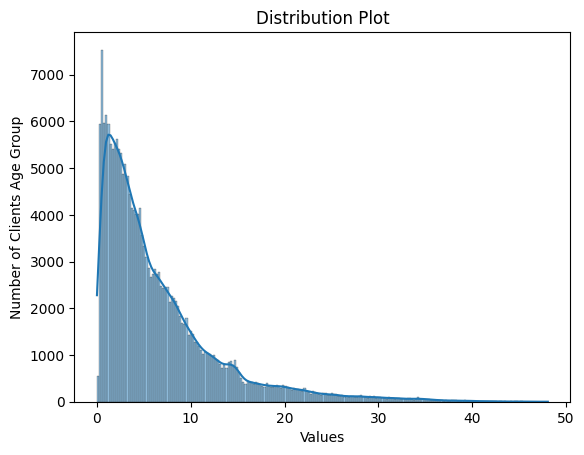

In [17]:



# Plotting
fig, ax = plt.subplots()
sns.histplot(days_unemployed, kde=True, ax=ax)

# Customize plot
ax.set_xlabel('Values')
ax.set_ylabel('Number of Clients Age Group')
ax.set_title('Distribution Plot')

# Display plot using streamlit
plt.show(fig)

In [27]:
data

DAYS_EMPLOYED  TARGET
0            1.745205       1
1            3.254795       0
2            0.616438       0
3            8.326027       0
4            8.323288       0
...               ...     ...
246000      13.405479       0
246003       1.331507       0
246005       0.232877       0
246006       1.635616       0
246007       0.326027       0

[201687 rows x 2 columns]

428
214.0


KeyError: 'DAYS_BIRTH'

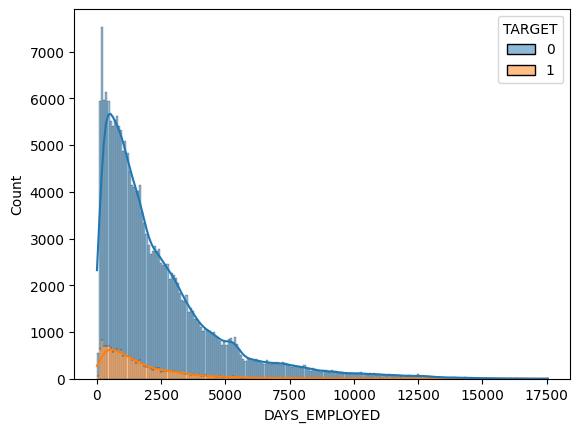

In [29]:

data = pd.concat([xdays_unemployed, ydays_unemployed], axis=1)
category = 'DAYS_EMPLOYED'


    
plot_histogram(data, category)

In [55]:
print(len(bin_counts)/2)
print(min(data['DAYS_BIRTH']), " ", max(data['DAYS_BIRTH']))
print("selected point: ", data.loc[highlighted_index, 'DAYS_BIRTH'])
scaled_point = int(round(data.loc[highlighted_index, 'DAYS_BIRTH']-min(data['DAYS_BIRTH'])))
print("scaled point: ", scaled_point)

print("steps :", (max(data['DAYS_BIRTH'])-min(data['DAYS_BIRTH']))/(len(bin_counts)/2))
hight = bin_counts[scaled_point]
print("hight :", hight)

77.0
20.517808219178082   69.04383561643836
selected point:  52.18082191780822
scaled point:  32
steps : 0.6302081480163673
hight : 337.0


/var/folders/vk/1tfz04l501xdcyxn99z965pw0000gn/T/ipykernel_43144/769176982.py:25: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


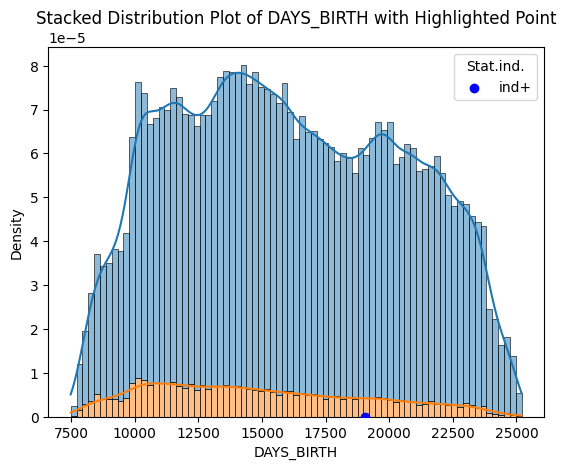

In [24]:
# Merge X_train and Y_train into a single DataFrame
data = pd.concat([X_train, Y_train], axis=1)

# Highlighted data point
highlighted_index = 2  # Index of the data point to highlight
highlighted_value = data.loc[highlighted_index, 'DAYS_BIRTH']

# Plotting
fig, ax = plt.subplots()
sns.histplot(data=data, x='DAYS_BIRTH', hue='TARGET', kde=True, stat='density', multiple='stack', ax=ax)

# Highlight one specific data point
if Y_train.loc[highlighted_index, 'TARGET'] == 1:
    ax.scatter(highlighted_value, 0, color='red', label='Highlighted Point', zorder=5)
elif Y_train.loc[highlighted_index, 'TARGET'] == 0:
    ax.scatter(highlighted_value, 0, color='blue', label='Highlighted Point', zorder=5)

# Customize plot
ax.set_xlabel('DAYS_BIRTH')
ax.set_ylabel('Density')
ax.set_title('Stacked Distribution Plot of DAYS_BIRTH with Highlighted Point')
ax.legend(title='TARGET')

legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['ind+', 'dep+'], title='Stat.ind.')
# Display plot using Streamlit
#st.pyplot(fig)
plt.show(fig)

/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


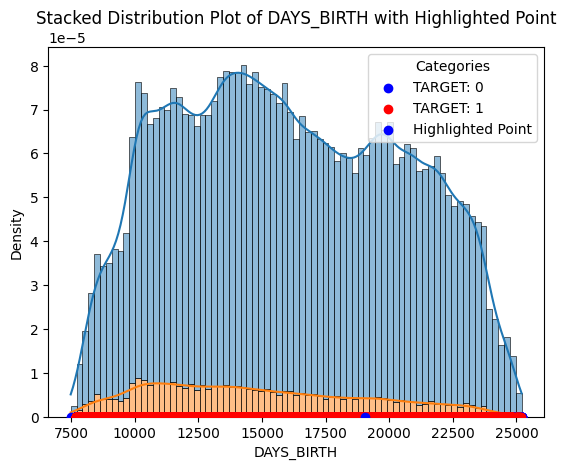

In [23]:
# Merge X_train and Y_train into a single DataFrame
data = pd.concat([X_train, Y_train], axis=1)

# Highlighted data point
highlighted_index = 2  # Index of the data point to highlight
highlighted_value = data.loc[highlighted_index, 'DAYS_BIRTH']

# Plotting
fig, ax = plt.subplots()
sns.histplot(data=data, x='DAYS_BIRTH', hue='TARGET', kde=True, stat='density', multiple='stack', ax=ax)

# Scatter plot for each category
for target_value, color in zip([0, 1], ['blue', 'red']):
    target_data = data[data['TARGET'] == target_value]
    ax.scatter(target_data['DAYS_BIRTH'], np.zeros_like(target_data['DAYS_BIRTH']), color=color, label=f'TARGET: {target_value}', zorder=5)

# Highlight the specific data point
highlighted_target = Y_train.loc[highlighted_index, 'TARGET']
highlighted_color = 'red' if highlighted_target == 1 else 'blue'
ax.scatter(highlighted_value, 0, color=highlighted_color, label='Highlighted Point', zorder=5)

# Customize plot
ax.set_xlabel('DAYS_BIRTH')
ax.set_ylabel('Density')
ax.set_title('Stacked Distribution Plot of DAYS_BIRTH with Highlighted Point')

# Display legend
ax.legend(title='Categories')

# Display plot
plt.show(fig)

In [9]:
#pip install chart_studio

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [8]:

import plotly.plotly as py
import plotly.graph_objs as go

base_chart = {
    "values": [40, 10, 10, 10, 10, 10, 10],
    "labels": ["-", "0", "20", "40", "60", "80", "100"],
    "domain": {"x": [0, .48]},
    "marker": {
        "colors": [
            'rgb(255, 255, 255)',
            'rgb(255, 255, 255)',
            'rgb(255, 255, 255)',
            'rgb(255, 255, 255)',
            'rgb(255, 255, 255)',
            'rgb(255, 255, 255)',
            'rgb(255, 255, 255)'
        ],
        "line": {
            "width": 1
        }
    },
    "name": "Gauge",
    "hole": .4,
    "type": "pie",
    "direction": "clockwise",
    "rotation": 108,
    "showlegend": False,
    "hoverinfo": "none",
    "textinfo": "label",
    "textposition": "outside"
}

meter_chart = {
    "values": [50, 10, 10, 10, 10, 10],
    "labels": ["Log Level", "Debug", "Info", "Warn", "Error", "Fatal"],
    "marker": {
        'colors': [
            'rgb(255, 255, 255)',
            'rgb(232,226,202)',
            'rgb(226,210,172)',
            'rgb(223,189,139)',
            'rgb(223,162,103)',
            'rgb(226,126,64)'
        ]
    },
    "domain": {"x": [0, 0.48]},
    "name": "Gauge",
    "hole": .3,
    "type": "pie",
    "direction": "clockwise",
    "rotation": 90,
    "showlegend": False,
    "textinfo": "label",
    "textposition": "inside",
    "hoverinfo": "none"
}

layout = {
    'xaxis': {
        'showticklabels': False,
        'showgrid': False,
        'zeroline': False,
    },
    'yaxis': {
        'showticklabels': False,
        'showgrid': False,
        'zeroline': False,
    },
    'shapes': [
        {
            'type': 'path',
            'path': 'M 0.235 0.5 L 0.24 0.65 L 0.245 0.5 Z',
            'fillcolor': 'rgba(44, 160, 101, 0.5)',
            'line': {
                'width': 0.5
            },
            'xref': 'paper',
            'yref': 'paper'
        }
    ],
    'annotations': [
        {
            'xref': 'paper',
            'yref': 'paper',
            'x': 0.23,
            'y': 0.45,
            'text': '50',
            'showarrow': False
        }
    ]
}

# we don't want the boundary now
base_chart['marker']['line']['width'] = 0

fig = {"data": [base_chart, meter_chart],
       "layout": layout}
py.iplot(fig, filename='gauge-meter-chart')

KeyboardInterrupt: 

In [14]:
import plotly.graph_objects as go

# Define the gauge chart layout
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 70,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Speed"},
    gauge = {
        'axis': {'range': [None, 100]},
        'steps' : [
            {'range': [0, 20], 'color': "lightgray"},
            {'range': [20, 40], 'color': "gray"},
            {'range': [40, 60], 'color': "lightgray"},
            {'range': [60, 80], 'color': "gray"},
            {'range': [80, 100], 'color': "lightgray"}],
        'threshold' : {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 90}
    }
))

# Show the plot
fig.show()

In [16]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 270,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Speed"}))

fig.show()